1. Let G = ({1, 2, 3, 4, 5, 7, 8, 9, 10}, {1 → 2, 2 → 1, 2 → 3, 2 → 2, 3 → 4, 3 → 2, 4 → 2, 4 →
4, 4 → 5, 5 → 4, 4 → 1, 1 → 5, 9 → 10, 8 → 7, 7 → 8, 4 → 9, 10 → 7, 8 → 1}). An
agent is placed at in a vertex 1. In each step the agent chooses randomly out-going
edge and goes to the vertex pointed by this edge. Find the distribution of the position
of the agent after 2,

In [1]:
import numpy as np
import random as r
import collections
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Let G
adjacency_matrix = np.array([
    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0],  
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],  
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0], 
    [1, 1, 0, 1, 1, 0, 0, 0, 1, 0], 
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0],  
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]   
])

In [22]:
def run_agent(steps):
    #An agent is placed at in a vertex 1.
    agent_position = 0

    for _ in range(steps): 
        neighbours = []
        #out-going edges
        for i in range(len(adjacency_matrix)):
            if adjacency_matrix[agent_position][i] == 1:
                neighbours.append(i)
        #in each step the agent chooses randomly out-going edge and goes to the vertex pointed by this edge
        agent_position = r.choice(neighbours)
    return agent_position

In [27]:
def run_agent_multiple_times(steps, MCS):
    final_positions = []
    for _ in range(MCS):
        final_positions.append(run_agent(steps))

    sns.histplot(final_positions, stat="probability", discrete=True)
    plt.title(f'Distribution after {steps} steps (MCS = {MCS})')
    plt.xlabel('Vertex')
    plt.ylabel('Probability')
    plt.show()

    # final_positions =[]
    # for i in range(MCS):
    #     final_positions.append(run_agent(steps))
    # # Postprocessing data
    # frequencies = collections.Counter(final_positions)
    # positions_ranked = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    # filename = f"{steps}_{MCS}.txt"
    # with open(filename, "w", encoding="utf8") as output_file:
    #     output_file.write("Rank\tFinal Position\tCount\tFreq\n")
    #     for rank, (position, count) in enumerate(positions_ranked, start=1):
    #         output_file.write(f"{rank}\t{position}\t{count}\t{count/MCS:.6f}\n")
    # print(f"Result saved to {filename}")

In [24]:
# Find the distribution of the position
# of the agent after 2, 3, 4, 50 and 100 steps
list_of_steps = [2,3,4,50,100]
MCS = 1000

In [ ]:
for steps in list_of_steps:
    run_agent_multiple_times(steps,MCS)

2. Let G = ({1, 2, 3, 4, 5, 6}, {1 → 2, 2 → 1, 2 → 2, 2 → 6, 2 → 3, 3 → 4, 4 → 5, 5 →
6, 6 → 1, 6 → 6}). Consider a random walk on G and find numerically its ergodic
probabilities.

In [30]:
#Let G
adjacency_matrix = np.array([
    [0, 1, 0, 0, 0, 0],  
    [1, 1, 1, 0, 0, 1],  
    [0, 0, 0, 1, 0, 0], 
    [0, 0, 0, 0, 1, 0], 
    [0, 0, 0, 0, 0, 1], 
    [1, 0, 0, 0, 0, 1]   
])

In [32]:
def run_ergodic_simulation(steps, MCS):
    final_positions = []
    for _ in range(MCS):
        final_positions.append(run_agent(steps))
        
    # Calculate ergodic probabilities
    frequencies = collections.Counter(final_positions)
    ergodic_probabilities = {node: count / MCS for node, count in frequencies.items()}

    sns.barplot(x=list(ergodic_probabilities.keys()), y=list(ergodic_probabilities.values()))
    plt.title(f'Ergodic Probabilities after {steps} steps (MCS = {MCS})')
    plt.xlabel('Node')
    plt.ylabel('Probability')
    plt.show()


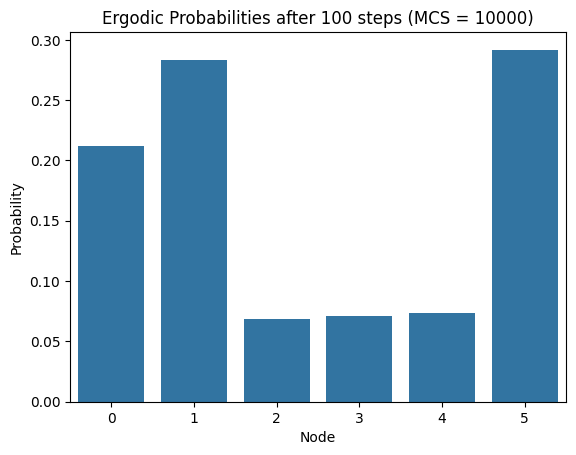

In [34]:
run_ergodic_simulation(steps=100, MCS=10000)
